<img src="imgs/dh_logo.png" align="right" width="50%">

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Kernel PCA

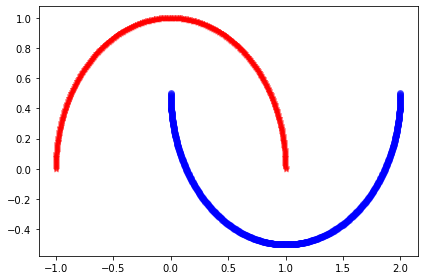

In [82]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='*', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

Vamos usar o PCA "normal" e checar se ele consegue dar conta de representar nosso conjunto de dados.

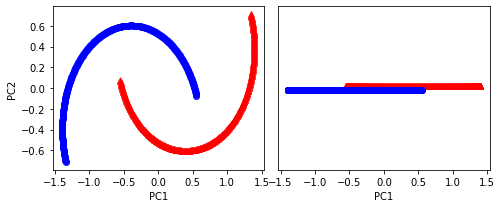

In [84]:

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

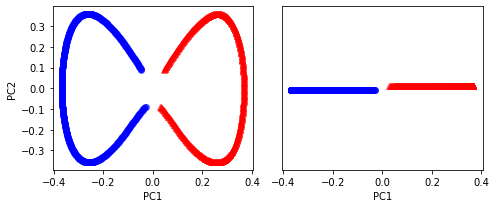

In [78]:
X_kpca = KernelPCA(n_components = 2, kernel="rbf", gamma=15).fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

In [49]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

Como o kPCA é um algoritmo de aprendizagem não supervisionado, não há uma medida de desempenho óbvia para ajudá-lo a selecionar os melhores valores de kernel e hiperparâmetro. Dito isso, a redução da dimensionalidade é muitas vezes uma etapa de preparação para uma tarefa de aprendizagem supervisionada (por exemplo, classificação), então você pode usar a pesquisa de grade para selecionar o kernel e hiperparâmetros que levam ao melhor desempenho nessa tarefa. O código a seguir cria um pipeline de duas etapas, primeiro reduzindo a dimensionalidade para duas dimensões usando kPCA e, em seguida, aplicando a regressão logística para classificação. Em seguida, ele usa GridSearchCV para encontrar o melhor valor de kernel e gama para kPCA a fim de obter a melhor precisão de classificação no final do pipeline: 

In [79]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=1)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.arange(0.1, 15, 0.4),
        "kpca__kernel": ["rbf", "sigmoid"]}]

In [80]:
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=1)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([ 0.1,  0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,
        4.5,  4.9,  5.3,  5.7,  6.1,  6.5,  6.9,  7.3,  7.7,  8.1,  8.5,
        8.9,  9.3,  9.7, 10.1, 10.5, 10.9, 11.3, 11.7, 12.1, 12.5, 12.9,
       13.3, 13.7, 14.1, 14.5, 14.9]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [81]:
print(grid_search.best_params_)

{'kpca__gamma': 13.3, 'kpca__kernel': 'rbf'}


# Manifold Learning

Enquanto o PCA tenta criar vários hiperplanos lineares para representar dimensões, bem como múltiplas construções de regressão como uma estimativa dos dados, o aprendizado manifold tenta aprender superfícies curvas suaves dentro do espaço multidimensional. Como na imagem abaixo, muitas vezes são formados por transformações sutis em uma imagem que, de outra forma, enganaria o PCA.

<img src="https://miro.medium.com/max/986/1*2U_hhsFygkNH3655s1n8Fw.png">

O que é um manifold?

Uma variedade bidimensional é qualquer forma 2-D que pode ser ajustada para caber em um espaço de dimensão superior torcendo-o ou dobrando-o, falando vagamente.

Qual é a hipótese múltipla?

Os algoritmos de aprendizagem manifold podem ser vistos como a versão não linear do PCA. Discutimos a importância da redução da dimensionalidade. Se você pensar em abordagens como o PCA, perceberá que estamos projetando os dados em alguma superfície de baixa dimensão. Mas isso é restritivo no sentido de que essas superfícies são todas lineares. E se a melhor representação estiver em alguma superfície de formato estranho? O PCA vai perder isso totalmente. Como você pode ver nesta figura aqui, os pontos de dados são distribuídos na forma de rolo suíço. O PCA não funcionaria muito bem nesta situação porque procurará uma superfície plana para descrever esses dados. Mas o problema é que a superfície plana não existe. Portanto, acabamos com alguma representação subótima dos dados. O aprendizado manifold resolve esse problema de maneira muito eficiente.


Enquanto o PCA tenta criar vários hiperplanos lineares para representar dimensões, bem como múltiplas construções de regressão como uma estimativa dos dados, o aprendizado múltiplo tenta aprender variedades, que são superfícies curvas suaves dentro do espaço multidimensional. Estruturas diferentes de dados referem-se a seus diferentes atributos nos dados. Por exemplo, pode ser linearmente separável ou pode ser muito esparso. Os relacionamentos dentro dos dados podem ser tangentes, paralelos, envolventes ou ortogonais a outros. O PCA funciona bem em um subconjunto muito específico de estruturas de dados, uma vez que opera na suposição de linearidade.


Os algoritmos para essa tarefa são baseados na ideia de que a dimensionalidade de muitos conjuntos de dados é apenas artificialmente alta. Embora os pontos de dados possam consistir em milhares de recursos, eles podem ser descritos como uma função de apenas alguns parâmetros subjacentes. Ou seja, os pontos de dados são, na verdade, amostras de uma variedade de baixa dimensão que está embutida em um espaço de alta dimensão. Os algoritmos de aprendizado manifold tentam descobrir esses parâmetros para encontrar uma representação de baixa dimensão dos dados. Existem muitas abordagens para resolver este problema, como Isomap, Locally Linear Embedding, Laplacian Eigenmaps, Semidefinite Embedding, etc. Esses algoritmos trabalham para extrair a variedade de baixa dimensão que pode ser usada para descrever os dados de alta dimensão.

A seguir estão os pressupostos ou aspectos fundamentais dos algoritmos de aprendizagem manifold:

- Existem relações não lineares nos dados que podem ser modeladas por meio  superfícies que abrangem várias dimensões, são suaves e não muito "onduladas" (muito complexas). As features são contínuas.

- Em vez de "aplainar" ou "projetar" (como no PCA) com direções específicas para manter a forma geral dos dados, não há problema em realizar manipulações mais complexas, como desdobrar uma tira enrolada ou virar uma esfera do avesso.

- O melhor método para modelar as features é tratar a superfície curva como sendo composta de várias vizinhanças. Se cada ponto de dados consegue preservar a distância não com todos os outros pontos, mas apenas com aqueles próximos a ele, as relações geométricas podem ser mantidas nos dados.



No conjunto de dados Swiss Roll, o PCA e mesmo variações especializadas como Kernel PCA falham em capturar o gradiente de valores. Por outro lado, o Locally Linear Embeddings (LLE), um algoritmo de aprendizado manifold, é capaz de fazer isso.

<img src="https://miro.medium.com/max/3000/1*iBp1V7VgElLp3fY5bXatcQ.png">

Vamos entrar em mais detalhes sobre 2 algoritmos populares de aprendizagem múltipla: IsoMap e t-SNE.

## Isomap


Uma das primeiras explorações no aprendizado múltiplo foi o algoritmo Isomap, abreviação de Mapeamento Isométrico. O Isomap busca uma representação dimensional inferior que mantém "distâncias geodésicas" entre os pontos. Uma distância geodésica é uma generalização da distância para superfícies curvas. 

Abaixo estão representadas duas reduções de dimensionalidade para o dataset MNIST. À esquerda, note que os targets estão mais sobrepostos, o que pode indicar algum padrão não-linear que não está sendo capturado pelo PCA. À esquerda temos a representação criada pelo Isomap.

<img src="https://miro.medium.com/max/2100/1*r5yuXOk23aojegoXlwVftw.png">

O Isomap tem um desempenho melhor do que o PCA quando treinado no conjunto de dados MNIST, mostrando um corte adequado de diferentes tipos de dígitos. A proximidade e distância entre certos grupos de dígitos é reveladora para a estrutura dos dados. Por exemplo, o '5' e o '3' que estão próximos um do outro (no canto inferior esquerdo) em distância realmente parecem semelhantes.
Abaixo está a implementação do Isomap em Python. Como MNIST é um conjunto de dados muito grande, você pode querer treinar Isomap apenas nos primeiros 100 exemplos de treinamento com .fit_transform (X [: 100]).

In [85]:
from sklearn.datasets import load_digits #mnist
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True) #load data

embedding = Isomap(n_components=2) #resulting data has 2 dimensions, 'components'
X_transformed = embedding.fit_transform(X) #fit model and transform


In [86]:
X_transformed

array([[ 167.27247954,   22.18515653],
       [ -48.71476497,   51.30840484],
       [-100.719723  ,   25.82132196],
       ...,
       [ -51.43618206,  -23.29369929],
       [  -0.22056414,  -73.32775967],
       [ -11.36581193,  -36.23661186]])

## t-SNE

t-SNE é uma das escolhas mais populares para visualização de alta dimensão e significa t-Distribution Stochastic Neighbor Embeddings. O algoritmo converte relacionamentos no espaço original em distribuições t, ou distribuições normais com tamanhos de amostra pequenos e desvios padrão relativamente desconhecidos. Isso torna o t-SNE muito sensível à estrutura local, um tema comum na aprendizagem manifold.


<img src="https://miro.medium.com/max/2100/1*q7LrHkh2vc1l-L86wpI_PQ.png">

O t-SNE foi 526 vezes mais lento que o LDA.

O t-SNE se concentra na estrutura local dos dados e tenta "extrair" pontos locais agrupados em vez de tentar "desenrolar" ou "desdobrar" as estruturas de dados. Isso dá ao t-SNE uma vantagem no desembaraço de dados de alta dimensão. É treinado usando gradiente descendente e tenta minimizar a entropia entre as distribuições.

Para rodar o t-SNE utilizamos basicamente 1 parametro: Perplexidade (perplexity),que está relacionado ao quão preocupado o algoritmo está em preservar as relações das vizinhanças.

No entanto, o t-SNE tem algumas desvantagens:

- t-SNE é muito caro computacionalmente (compare os tempos de execução nos diagramas acima). Pode levar várias horas em um conjunto de dados de um milhão de amostras, enquanto o PCA pode terminar em segundos ou minutos.
O algoritmo depende da aleatoriedade (estocástica) para selecionar sementes para construir embeddings, o que pode aumentar seu tempo de execução e diminuir o desempenho se as sementes forem colocadas incorretamente.

- A estrutura global não é explicitamente preservada (ou seja, mais ênfase no agrupamento do que na demonstração de estruturas globais). No entanto, na implementação do sklearn, este problema pode ser resolvido inicializando pontos com PCA, que é construído especialmente para preservar a estrutura global.

In [90]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2) #result has 2 features
X_transformed = embedding.fit_transform(X)

O autor do t-SNE recomenda:
"Como verificação de integridade, tente executar o PCA em seus dados para reduzi-los a duas dimensões. Se isso também der resultados ruins, então talvez não haja uma estrutura muito boa em seus dados em primeiro lugar. Se o PCA funcionar bem, mas o t-SNE não, tenho quase certeza de que você fez algo errado."


Por que ele disse isso? Como um lembrete adicional para acertar o ponto, o aprendizado manifold não é outra variação do PCA, mas uma generalização. Algo que funciona bem no PCA é quase garantido que funcionará bem no t-SNE ou em outra técnica de aprendizado manifold, uma vez que são generalizações.
Assim como um objeto que é uma maçã também é uma fruta (uma generalização), geralmente algo está errado se algo não produzir um resultado semelhante ao de sua generalização. Por outro lado, se ambos os métodos falharem, os dados provavelmente são intrinsecamente difíceis de modelar.
